In [90]:
# pretty boxplot
# install.packages('ggthemes')
library(ggthemes)
library(ggplot2)

In [91]:
# load('/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy2/data/Cleaned_Data/cbMen.rda')
load('C:/Users/casey/Dropbox/SMU_DataScience/MSDS_7333_QuantifyingTheWorld/QTW_CaseStudies/CaseStudy2/data/Cleaned_Data/cbMen.rda')

# Question 10

# Box Plots

In [92]:
# Lets make box plots of age across all 14 years of the race
head(cbMen)

,year,sex,name,home,age,runTime
1999.1,1999,M,Worku Bikila,Ethiopia,28,46.98333
1999.2,1999,M,Lazarus Nyakeraka,Kenya,24,47.01667
1999.3,1999,M,James Kariuki,Kenya,27,47.05000
1999.4,1999,M,William Kiptum,Kenya,28,47.11667
1999.5,1999,M,Joseph Kimani,Kenya,26,47.51667
1999.6,1999,M,Josphat Machuka,Kenya,25,47.55000


In [93]:
library(dplyr)
cbMen$year = as.factor(cbMen$year)
ages = group_by(cbMen, year)
ageSummary = summarize(ages, ageMean = mean(age, na.rm = TRUE),ageMedian = median(age, na.rm = TRUE), count=n())
ageSummary

year,ageMean,ageMedian,count
1999,40.33521,40,3190
2000,40.40782,40,3016
2001,40.27548,39,3561
2002,40.28756,39,3723
2003,40.34567,39,3946
2004,39.31280,38,4156
2005,39.55934,38,4324
2006,38.90564,38,5235
2007,38.51000,37,5252
2008,37.78357,36,5905


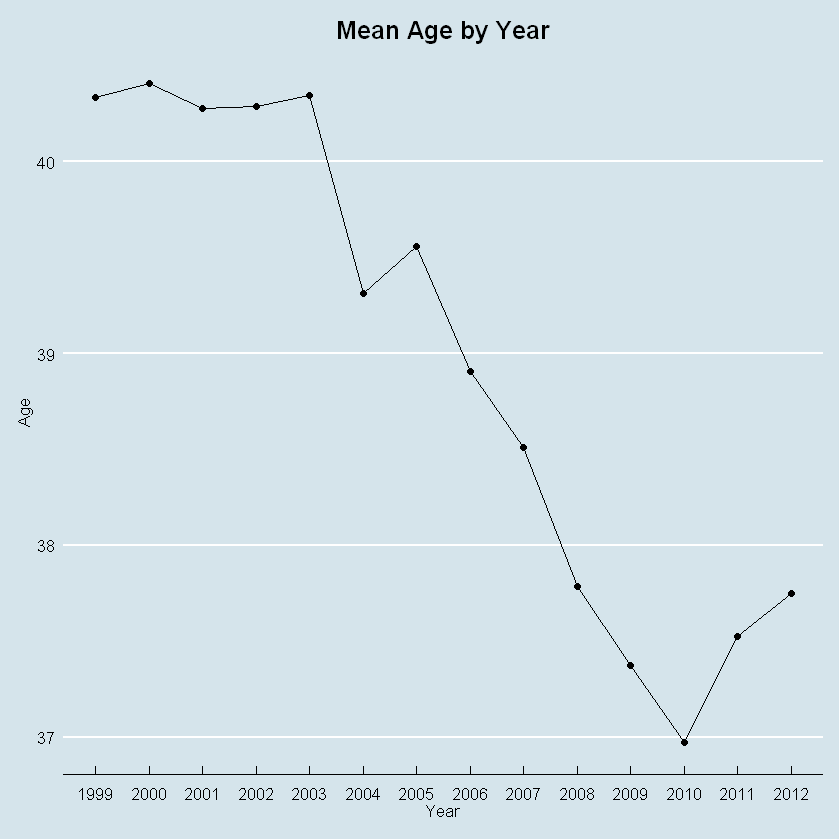

In [94]:
# plot(ageSummary$ageMean ~ ageSummary$year, type="l", lwd = 2,
#      xlab = "Years", ylab = "Number of Runners")
# par(oldPar)
# dev.off()


ggplot(ageSummary, aes(x=year, y=ageMean, group=1)) +
geom_line() +
geom_point() + 
ggtitle("Mean Age by Year") +
xlab("Year") +
ylab("Age") + 
# theme_fivethirtyeight() +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))



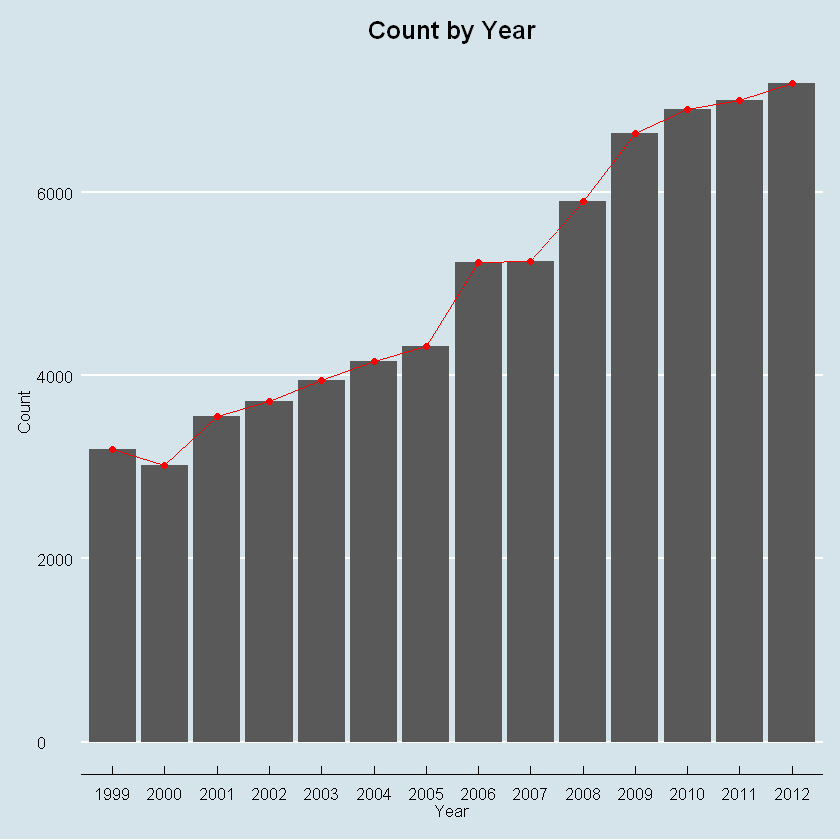

In [95]:
# plot(ageSummary$ageMean ~ ageSummary$year, type="l", lwd = 2,
#      xlab = "Years", ylab = "Number of Runners")
# par(oldPar)
# dev.off()


ggplot(ageSummary, aes(x=year, y=count, group=1)) + 
geom_col() +
geom_line(color='red') +
geom_point(color='red') +
ggtitle("Count by Year") +
xlab("Year") +
ylab("Count") + 
# theme_fivethirtyeight() +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))



In [105]:
linearMod <- lm(count ~ as.numeric(year), data=ageSummary)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = count ~ as.numeric(year), data = ageSummary)

Coefficients:
     (Intercept)  as.numeric(year)  
          2357.9             352.9  



[1] 5 9

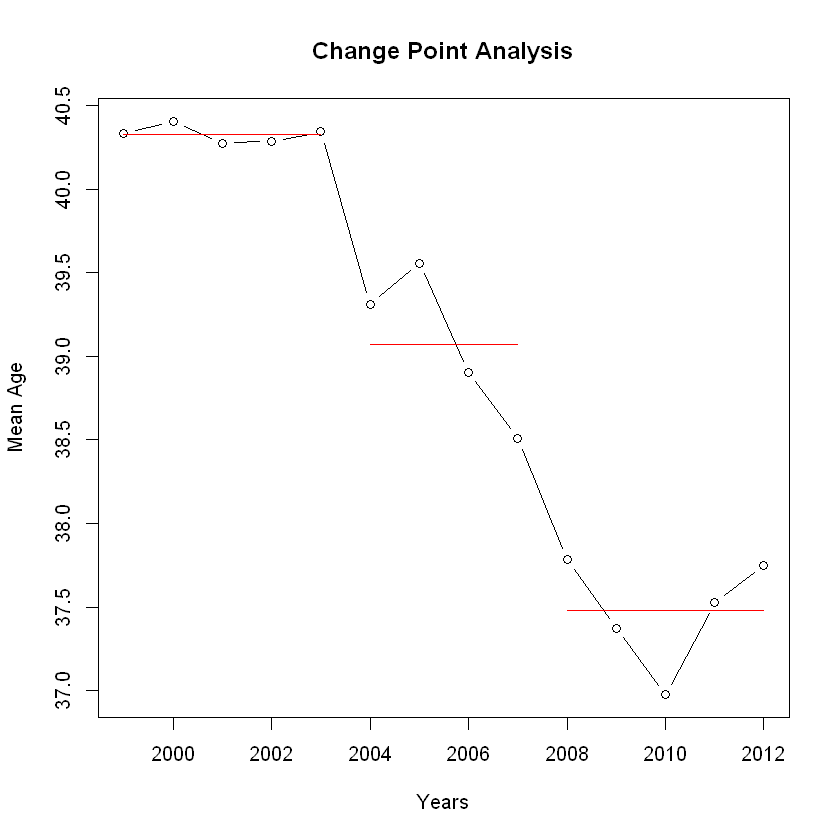

In [71]:
# value.ts = ts(Value, frequency=12, start=c(2000,1), end=c(2006,12)) #create subset by date and make it a time series
value.ts <- ts(as.numeric(ageSummary$ageMean), start = 1999)
# plot(value.ts)

# install.packages('changepoint')
library(changepoint)
mvalue = cpt.meanvar(value.ts, method='PELT')
cpts(mvalue)
plot(mvalue, type="b", xlab = "Years", ylab = "Mean Age", main='Change Point Analysis')

[1] 2 7 9

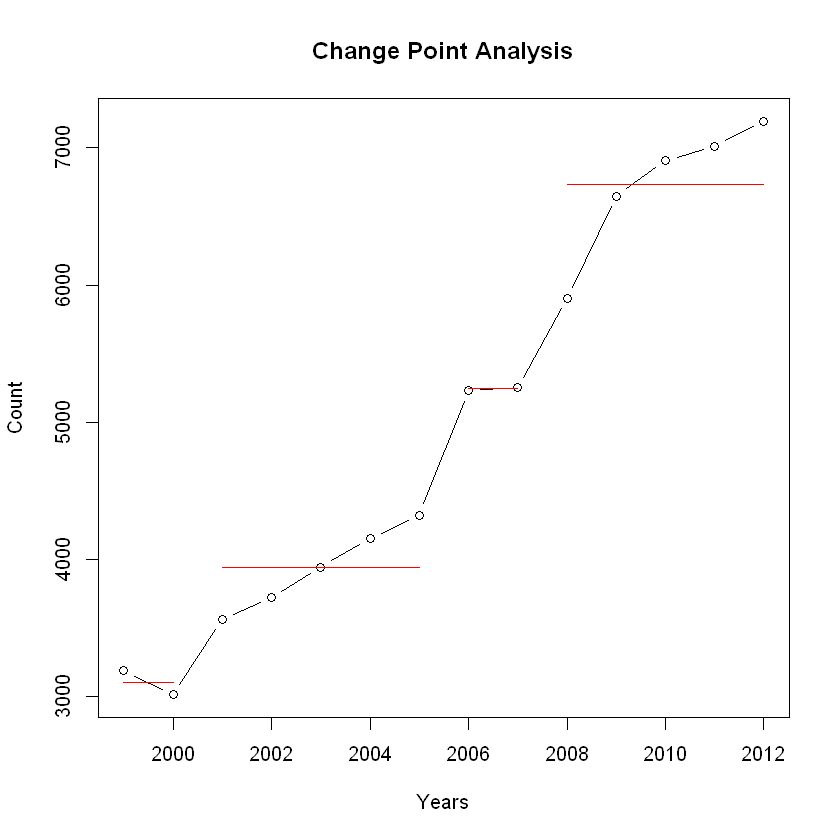

In [99]:
# value.ts = ts(Value, frequency=12, start=c(2000,1), end=c(2006,12)) #create subset by date and make it a time series
value.ts <- ts(as.numeric(ageSummary$count), start = 1999)
# plot(value.ts)

# install.packages('changepoint')
library(changepoint)
mvalue = cpt.meanvar(value.ts, method='PELT')
cpts(mvalue)
plot(mvalue, type="b", xlab = "Years", ylab = "Count", main='Change Point Analysis')

Warning message:
"Removed 23 rows containing non-finite values (stat_boxplot)."

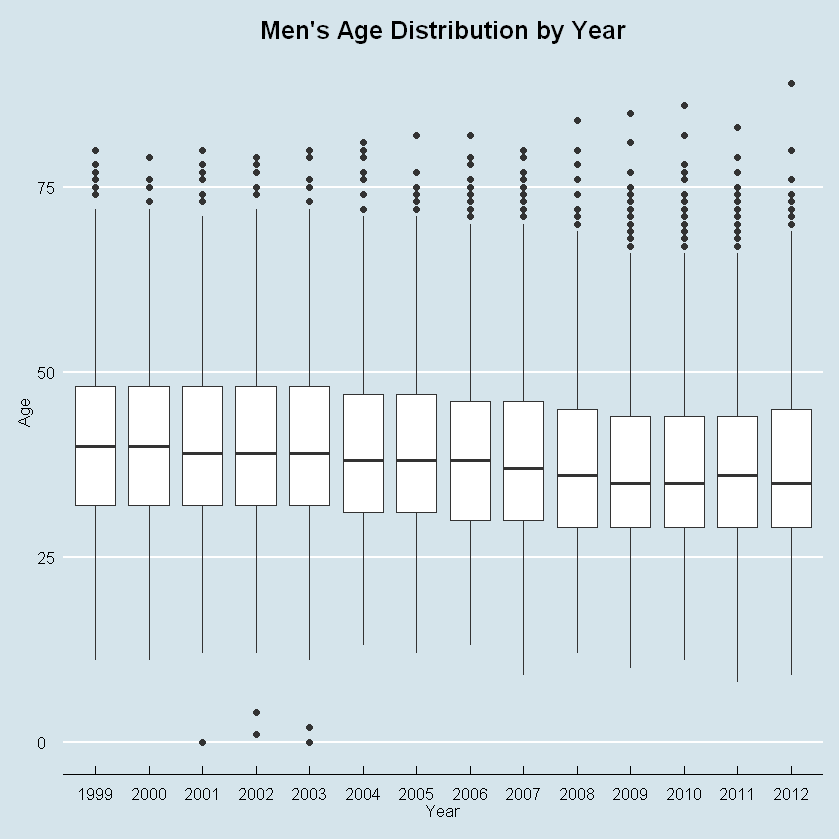

In [84]:

ggplot(cbMen, aes(x=as.factor(year), y=age)) + 
geom_boxplot() + 
ggtitle("Men's Age Distribution by Year") +
xlab("Year") +
ylab("Age") + 
# theme_fivethirtyeight() +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))



## QQ Plots

Warning message:
"Removed 23 rows containing non-finite values (stat_qq)."

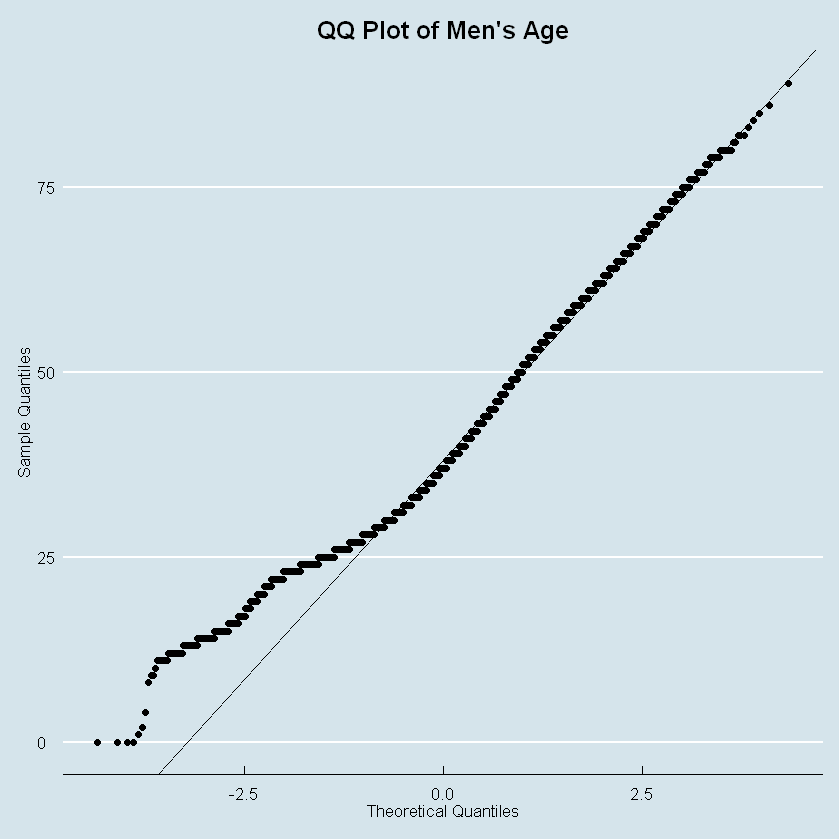

In [10]:
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]


p = qplot(sample=age, data=cbMen, color=year) + 
geom_abline(slope = slope, intercept = int) + 
ggtitle("QQ Plot of Men's Age") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))
p

Warning message:
"Removed 23 rows containing non-finite values (stat_qq)."

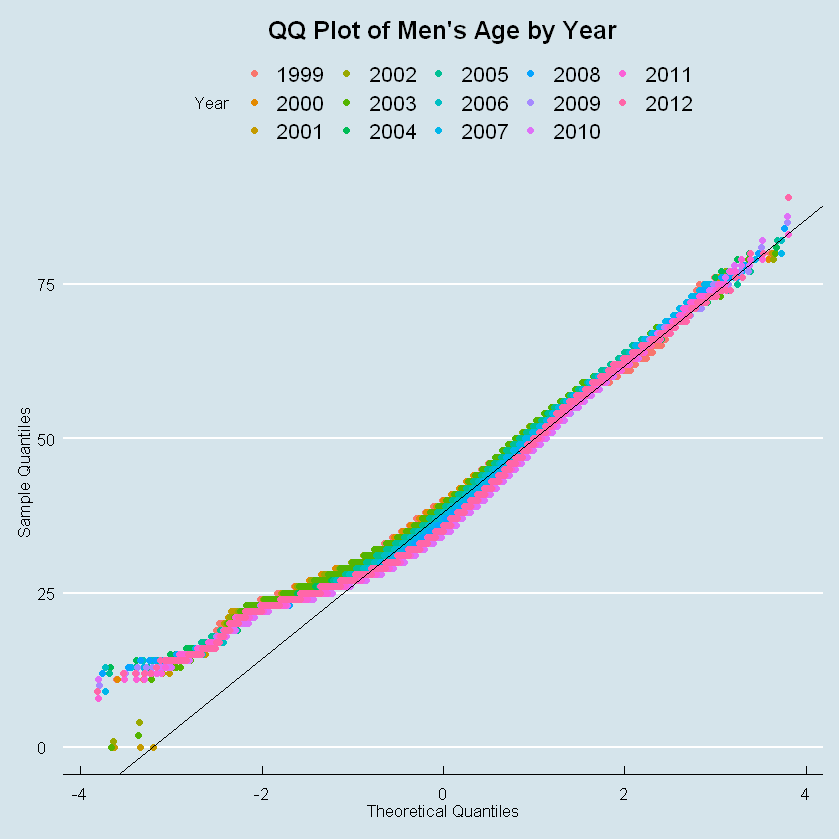

In [11]:
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]
Year = as.factor(cbMen$year)

p = qplot(sample=age, data=cbMen, color=Year) + 
geom_abline(slope = slope, intercept = int) + 
ggtitle("QQ Plot of Men's Age by Year") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
"Removed 23 rows containing non-finite values (stat_qq)."

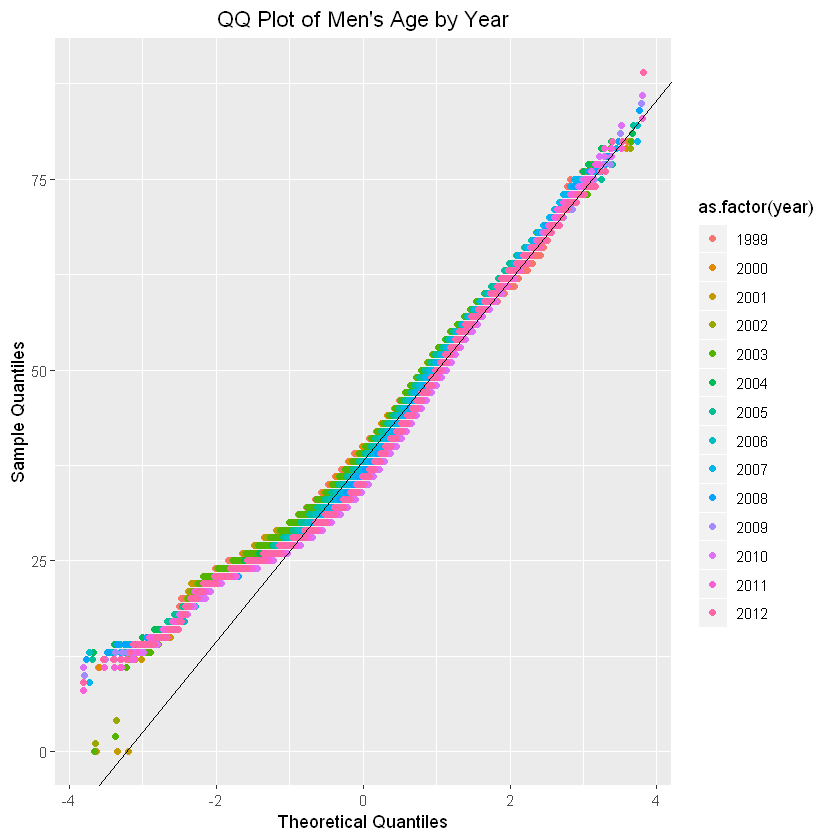

In [12]:
# Make a pretty plot
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]


p = qplot(sample=age, data=cbMen, color=as.factor(year)) + 
geom_abline(slope = slope, intercept = int) +
ggtitle("QQ Plot of Men's Age by Year") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme(plot.title = element_text(hjust = 0.5))

# theme_economist()

p

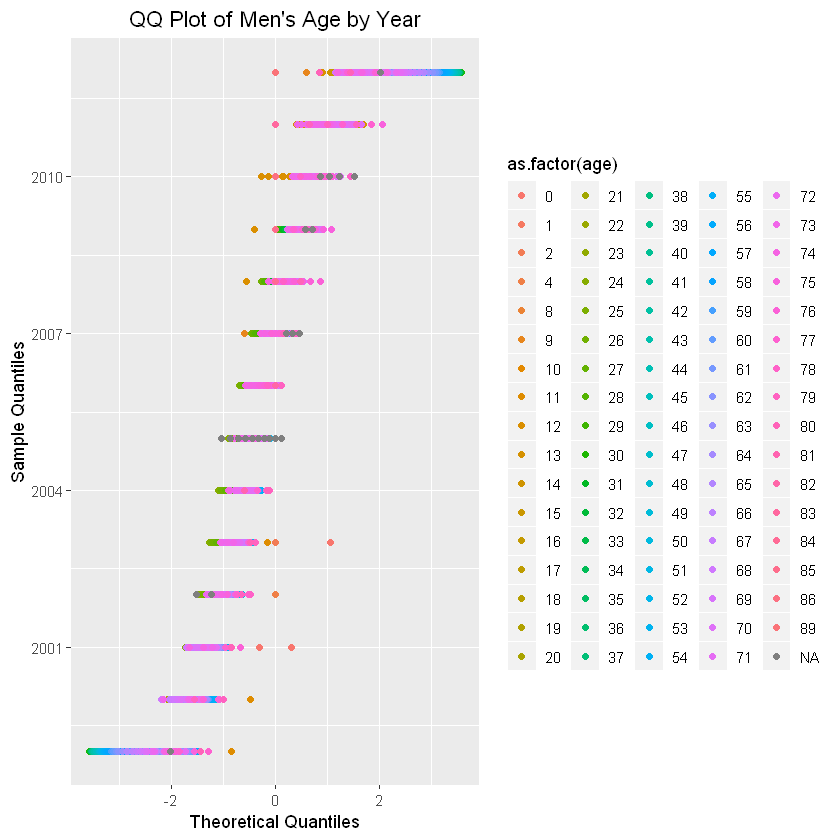

In [13]:
# Make a pretty plot
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]


p = qplot(sample=year, data=cbMen, color=as.factor(age)) + 
geom_abline(slope = slope, intercept = int) +
ggtitle("QQ Plot of Men's Age by Year") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme(plot.title = element_text(hjust = 0.5))

# theme_economist()

p

## Density Curves

Warning message:
“Removed 23 rows containing non-finite values (stat_density).”

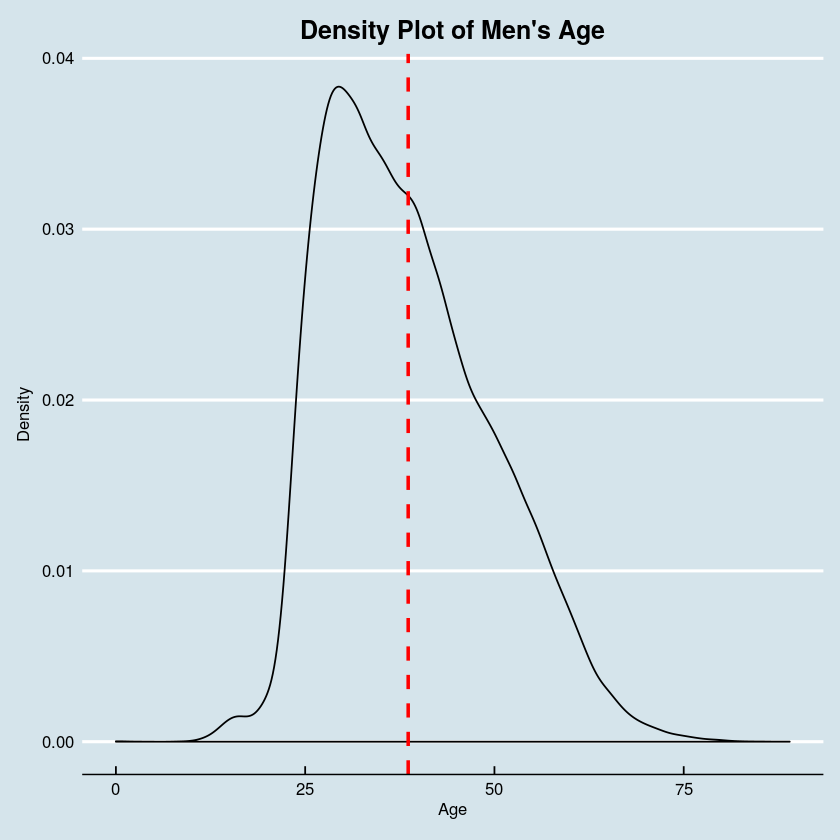

In [88]:
mean_age = mean(cbMen$age, na.rm = TRUE)

p = ggplot(cbMen, aes(x=age)) + 
geom_density() + 
geom_vline(aes(xintercept=mean_age), color="red", linetype="dashed", size=1) + 
ggtitle("Density Plot of Men's Age") + 
xlab("Age") + 
ylab("Density") + 
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
"Removed 23 rows containing non-finite values (stat_density)."

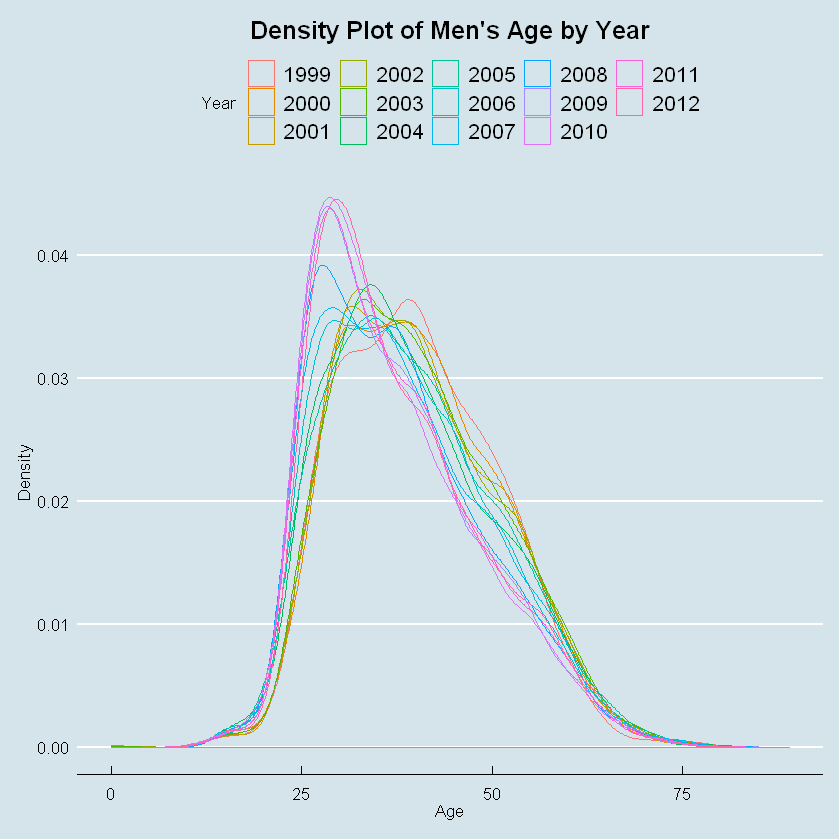

In [13]:
Year = as.factor(cbMen$year)

p = ggplot(cbMen, aes(age, color=Year)) + 
geom_density() + 
ggtitle("Density Plot of Men's Age by Year") + 
xlab("Age") + 
ylab("Density") + 
labs(color="Year") +
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
“Removed 23 rows containing non-finite values (stat_density).”

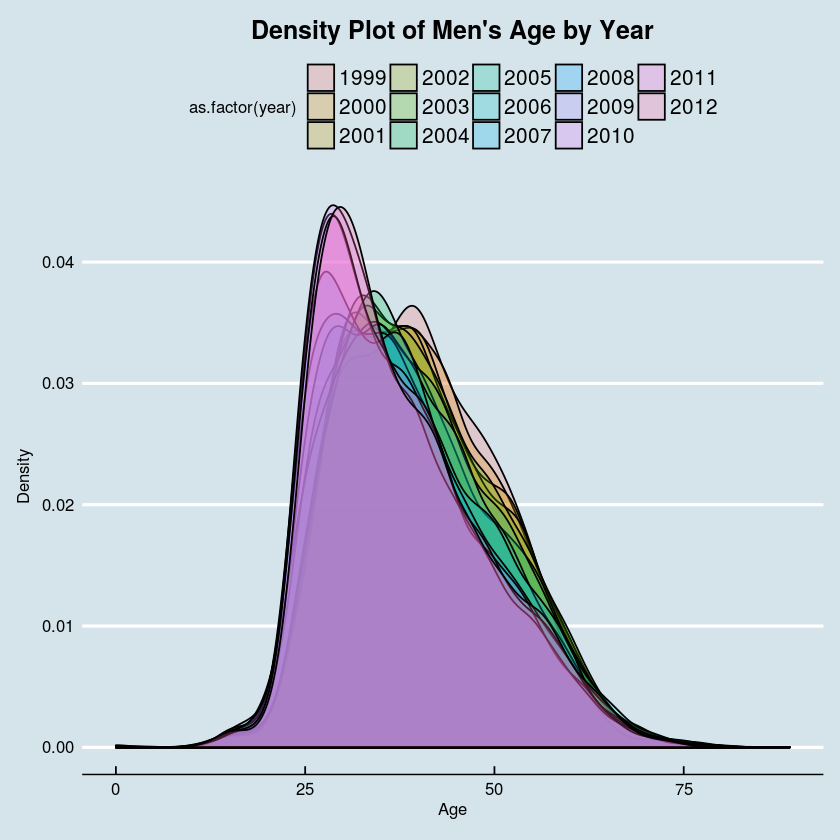

In [90]:
p = ggplot(cbMen, aes(age, fill=as.factor(year))) + 
geom_density(alpha=0.25) + 
ggtitle("Density Plot of Men's Age by Year") + 
xlab("Age") + 
ylab("Density") + 
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p

## ANOVA Of AGE BY YEAR

In [15]:
Year = as.factor(cbMen$year)

res.aov <- aov(age ~ Year, data = cbMen)

summary(res.aov)

               Df  Sum Sq Mean Sq F value Pr(>F)    
Year           13  104183    8014   68.33 <2e-16 ***
Residuals   70033 8214113     117                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
23 observations deleted due to missingness

In [18]:
TukeyHSD(res.aov, "Year")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = age ~ Year, data = cbMen)

$Year
                 diff         lwr         upr     p adj
2000-1999  0.07261013 -0.84989860  0.99511886 1.0000000
2001-1999 -0.05973039 -0.94521529  0.82575451 1.0000000
2002-1999 -0.04765769 -0.92410225  0.82878687 1.0000000
2003-1999  0.01045170 -0.85438420  0.87528760 1.0000000
2004-1999 -1.02241403 -1.87742836 -0.16739971 0.0047385
2005-1999 -0.77587312 -1.62406218  0.07231593 0.1153331
2006-1999 -1.42957965 -2.24544051 -0.61371880 0.0000004
2007-1999 -1.82521290 -2.64066176 -1.00976403 0.0000000
2008-1999 -2.55164156 -3.34978837 -1.75349474 0.0000000
2009-1999 -2.96301682 -3.74538590 -2.18064773 0.0000000
2010-1999 -3.35997946 -4.13759525 -2.58236368 0.0000000
2011-1999 -2.81018271 -3.58593910 -2.03442632 0.0000000
2012-1999 -2.58632715 -3.35902555 -1.81362874 0.0000000
2001-2000 -0.13234052 -1.03112339  0.76644235 0.9999998
2002-2000 -0.12026783 -1.0101454

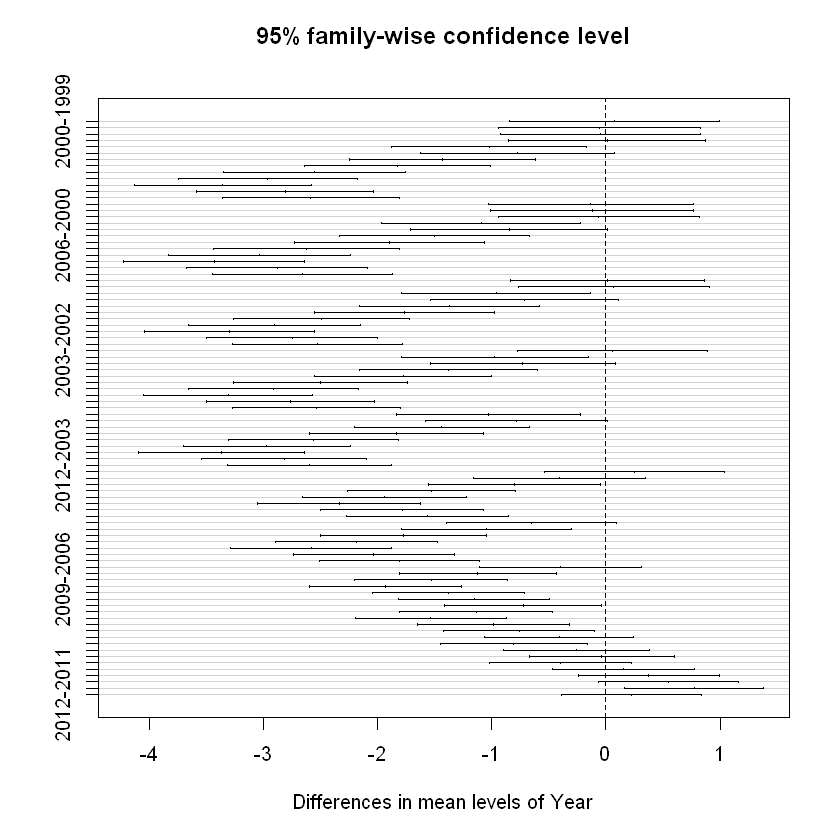

In [20]:
plot(TukeyHSD(res.aov))

In [89]:
cbMen

,year,sex,name,home,age,runTime
1999.1,1999,M,Worku Bikila,Ethiopia,28,46.98333
1999.2,1999,M,Lazarus Nyakeraka,Kenya,24,47.01667
1999.3,1999,M,James Kariuki,Kenya,27,47.05000
1999.4,1999,M,William Kiptum,Kenya,28,47.11667
1999.5,1999,M,Joseph Kimani,Kenya,26,47.51667
1999.6,1999,M,Josphat Machuka,Kenya,25,47.55000
1999.7,1999,M,Julius Randich,Kenya,26,47.61667
1999.8,1999,M,Leonid Shvetsov,Russia,30,49.16667
1999.9,1999,M,Reuben Chesang,Kenya,38,49.36667
1999.10,1999,M,Daniel Kihara,Kenya,30,49.38333
